# Figure 6: Spatial receptive fields

# import

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pickle5 as pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

# Load data

In [4]:
import pandas as pd
df = pd.read_pickle('ADD_YOUR_PATH_TO_DATA_HERE/df_rfs.pkl')

In [294]:
df.keys()

Index(['experimenter', 'date', 'exp_num', 'field', 'stim_name', 'raw_id',
       'condition', 'roi_id', 'preprocess_id', 'dnoise_params_id',
       'sta_params_id', 'split_rf_params_id', 'training_data_hash',
       'classifier_params_hash', 'condition2', 'srf', 'trf', 'split_qidx',
       'trf_peak_idxs', 'srf_fit', 'srf_center_fit', 'srf_surround_fit',
       'srf_params', 'srf_eff_center', 'rf_qidx', 'rf_area_um2', 'rf_cdia_um',
       'center_index', 'surround_index', 'celltype', 'max_confidence',
       'confidence', 'preproc_chirp', 'preproc_bar', 'srf2', 'trf2',
       'split_qidx2', 'trf_peak_idxs2', 'srf_params2', 'rf_qidx_2',
       'rf_cdia_um_2', 'center_index2', 'surround_index2', 'dia_diff',
       'surround_index_diff'],
      dtype='object')

In [6]:
df_plot = df.copy()
print(len(df_plot))
df_plot = df_plot[(df_plot.rf_qidx >= 0.) & (df_plot.rf_qidx_2 >= 0.45)]
print(len(df_plot))
df_plot = df_plot.groupby(["celltype", 'condition2']).filter(lambda x: len(x) >= 10)
print(len(df_plot))
df_plot.head()

1727
615
468


,experimenter,date,exp_num,field,stim_name,raw_id,condition,roi_id,preprocess_id,dnoise_params_id,...,trf2,split_qidx2,trf_peak_idxs2,srf_params2,rf_qidx_2,rf_cdia_um_2,center_index2,surround_index2,dia_diff,surround_index_diff
14,Arlinghaus,2022-06-10,2,GCL0,noise,1,C1,3,1,1,...,"[0.20204984, 0.27117282, 0.14933422, -0.054278...",-0.063955,"[8, 11]","{'amplitude_0': -0.3080397741900187, 'x_mean_0...",0.498547,206.947,-0.262292,0.117894,-17.706,0.212496
20,Arlinghaus,2022-06-10,2,GCL0,noise,1,C1,20,1,1,...,"[0.04871478, 0.046366762, 0.05901878, 0.033445...",0.068434,"[7, 11]","{'amplitude_0': -0.40689455838785715, 'x_mean_...",0.642601,176.028,-0.281347,0.211206,-30.195,0.110210
24,Arlinghaus,2022-06-10,2,GCL0,noise,1,C1,30,1,1,...,"[0.03563478, 0.04851507, -0.006033437, -0.1903...",-0.126491,"[8, 11]","{'amplitude_0': -0.1990592353746325, 'x_mean_0...",0.461977,328.333,-0.403514,-0.055423,-23.101,0.427960
29,Arlinghaus,2022-06-10,2,GCL0,noise,1,C1,45,1,1,...,"[0.14922825, 0.11570152, 0.10135669, 0.1112001...",-0.070206,"[8, 11]","{'amplitude_0': -0.3587665042725091, 'x_mean_0...",0.636731,198.440,-0.289041,0.212704,NaN,NaN
33,Arlinghaus,2022-06-10,2,GCL0,noise,1,C1,55,1,1,...,"[0.033454068, 0.02542036, -0.06906682, -0.1260...",-0.055510,"[7, 10]","{'amplitude_0': -0.31232307874597737, 'x_mean_...",0.671672,241.609,-0.404587,-0.056591,-73.358,0.094916


In [8]:
from matplotlib.patches import Ellipse

def plot_srf(ax, srf=None, vabsmax=None, srf_params=None, n_std=2, color='k', **kwargs):
    # Plot Fit.
    if srf_params is not None:
        ax.plot(srf_params['x_mean_0'], srf_params['y_mean_0'], zorder=100, marker='x', ms=3, c=color, **kwargs)
        ax.add_patch(Ellipse(
            xy=(srf_params['x_mean_0'], srf_params['y_mean_0']),
            width=n_std*2*srf_params['x_stddev_0'],
            height=n_std*2*srf_params['y_stddev_0'],
            angle=np.rad2deg(srf_params['theta_0']), color=color, fill=False, **kwargs))
        
    if srf is not None:
        ax.imshow(srf, vmin=-vabsmax, vmax=vabsmax, cmap='coolwarm', zorder=0)    

# Figure

In [32]:
df_only_D = df_plot[(df_plot.condition2=='D')]

In [167]:
from IPython.display import clear_output

In [248]:
def validate_STA(example):

    fig,ax=plt.subplots(1,2,figsize=(6,3))

    vabsmax = np.maximum(np.max(np.abs(example.srf)), np.max(np.abs(example.srf2)))
    plot_srf(ax[0], srf_params=example.srf_params2, color='gray', ls='--')
    plot_srf(ax[0], srf=example.srf, vabsmax=vabsmax, srf_params=example.srf_params)
    ax[0].set(xticks=[], yticks=[])
    ax[0].set_title('Ctrl',fontsize=10)

    plot_srf(ax[1], srf_params=example.srf_params, color='gray', ls='--')
    plot_srf(ax[1], srf=example.srf2, vabsmax=vabsmax, srf_params=example.srf_params2)
    ax[1].set(xticks=[], yticks=[])
    ax[1].set_title('DETA/NO',fontsize=10)
    
    fig.suptitle('G'+str(example.celltype),y=1.02)
    
    plt.show()

    clear_output(wait=True)
    user_input = input()
    if user_input == '1':
        result = 1
    elif user_input == '0':
        result = -1
    else:
        print('Try again', end='\r')
        result = validate_STA(example)

    return result

In [249]:
cells_good_fit_2 = []
print('Press 1 to validate the ellipse, 0 to discard it.')
i_cell = 0
for cell_nb in range(len(df_only_D)):
    result = validate_STA(df_only_D.iloc[cell_nb])
    if result == 1:
        cells_good_fit_2 += [cell_nb]
    else:
        pass

 0


### define new dataframe containing only selected cells

In [251]:
df_good_fits_rfs = df_only_D.iloc[cells_good_fit_2]

### reject types with <5 cells

In [256]:
df_good_fits_rfs_filtered = df_good_fits_rfs.groupby(["celltype", 'condition2']).filter(lambda x: len(x) >= 5)

In [257]:
# compute diameter difference in percentage
dia_diff_perc = np.zeros(len(df_good_fits_rfs_filtered))
for i in range(len(df_good_fits_rfs_filtered)):
    dia_diff_perc[i] = (df_good_fits_rfs_filtered.rf_cdia_um_2.iloc[i] - df_good_fits_rfs_filtered.rf_cdia_um.iloc[i])/np.maximum(df_good_fits_rfs_filtered.rf_cdia_um_2.iloc[i], df_good_fits_rfs_filtered.rf_cdia_um.iloc[i])*100

In [258]:
df_good_fits_rfs_filtered['dia_diff_perc'] = dia_diff_perc

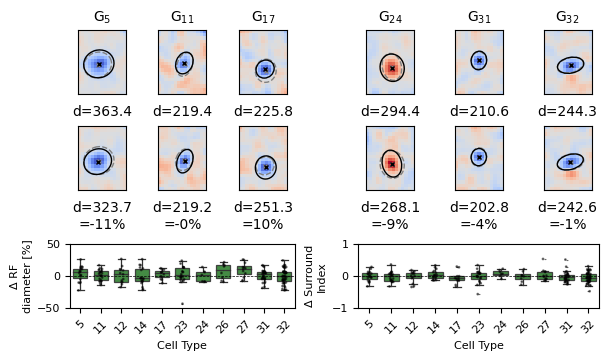

In [272]:
c_type_1 = 5
c_type_2 = 11
c_type_3 = 17
c_type_4 = 24
c_type_5 = 31
c_type_6 = 32


fig = plt.figure(constrained_layout=True,figsize=(6,3.5))
ax = fig.subplot_mosaic(
    """
    CDEFGH
    IJKLMN
    AAABBB
    """)

sns.boxplot(ax=ax['A'], 
            data=df_good_fits_rfs_filtered, 
            y="dia_diff_perc", 
            x="celltype", 
            hue='condition2',
            linewidth=.9,
            boxprops=dict(alpha=.9),
            fliersize=0.2,
            width=0.7,
            zorder=1,
            palette=dict(D='forestgreen'))

sns.stripplot(ax=ax['A'], 
            data=df_good_fits_rfs_filtered, 
            y="dia_diff_perc", 
            x="celltype", 
            hue='condition2',
            palette=dict(D='black'),
            edgecolor='gray',
            size=1,
            zorder=2,
            alpha=0.5,
            linewidth=1)


ax['A'].legend([],frameon=False)   
ax['A'].set_ylabel('\u0394 RF\ndiameter [%]',fontsize=8)
ax['A'].set_xlabel('Cell Type',fontsize=8)
ax['A'].axhline(0,lw=0.5,ls='--',color='k')
ax['A'].tick_params(axis='both', which='major', labelsize=8)
ax['A'].set_xticklabels(ax['A'].get_xticklabels(), rotation=45)
ax['A'].set_ylim(-50,50)


sns.boxplot(ax=ax['B'], 
            data=df_good_fits_rfs_filtered, 
            y="surround_index_diff", 
            x="celltype", 
            hue='condition2',
            linewidth=.9,
            boxprops=dict(alpha=.9),
            fliersize=0.2,
            width=0.7,
            zorder=1,
            palette=dict(D='forestgreen'))


sns.stripplot(ax=ax['B'], 
            data=df_good_fits_rfs_filtered, 
            y="surround_index_diff", 
            x="celltype", 
            hue='condition2',
            palette=dict(D='black'),
            edgecolor='gray',
            size=1,
            zorder=2,
            alpha=0.5,
            linewidth=1)

ax['B'].legend([],frameon=False)   
ax['B'].set_ylabel('\u0394 Surround\nIndex',fontsize=8)
ax['B'].set_xlabel('Cell Type',fontsize=8)
ax['B'].axhline(0,lw=0.5,ls='--',color='k')
ax['B'].tick_params(axis='both', which='major', labelsize=8)
ax['B'].set_xticklabels(ax['A'].get_xticklabels(), rotation=45)
ax['B'].set_ylim(-1,1)

### example RFs

##### Example 1

example_1 = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==c_type_1].iloc[0]
vabsmax = np.maximum(np.max(np.abs(example_1.srf)), np.max(np.abs(example_1.srf2)))
plot_srf(ax['C'], srf_params=example_1.srf_params2, color='gray', ls='--')
plot_srf(ax['C'], srf=example_1.srf, vabsmax=vabsmax, srf_params=example_1.srf_params)
ax['C'].set(xticks=[], yticks=[])
ax['C'].set(xlabel=f'd={example_1.rf_cdia_um:.1f}')
ax['C'].set_title('G$_{'+str(c_type_1)+'}$',fontsize=10)

plot_srf(ax['I'], srf_params=example_1.srf_params, color='gray', ls='--')
plot_srf(ax['I'], srf=example_1.srf2, vabsmax=vabsmax, srf_params=example_1.srf_params2)
ax['I'].set(xticks=[], yticks=[])
diff = example_1.rf_cdia_um_2 - example_1.rf_cdia_um
ax['I'].set(xticks=[], yticks=[])
ax['I'].set(xlabel=f'd={example_1.rf_cdia_um_2:.1f}\n'+ fr'={diff/np.maximum(example_1.rf_cdia_um, example_1.rf_cdia_um_2):.0%}')

##### Example 2

example_2 = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==c_type_2].iloc[1]
vabsmax = np.maximum(np.max(np.abs(example_2.srf)), np.max(np.abs(example_2.srf2)))
plot_srf(ax['D'], srf_params=example_2.srf_params2, color='gray', ls='--')
plot_srf(ax['D'], srf=example_2.srf, vabsmax=vabsmax, srf_params=example_2.srf_params)
ax['D'].set(xlabel=f'd={example_2.rf_cdia_um:.1f}')
ax['D'].set(xticks=[], yticks=[])
ax['D'].set_title('G$_{'+str(c_type_2)+'}$',fontsize=10)

plot_srf(ax['J'], srf_params=example_2.srf_params, color='gray', ls='--')
plot_srf(ax['J'], srf=example_2.srf2, vabsmax=vabsmax, srf_params=example_2.srf_params2)
ax['J'].set(xticks=[], yticks=[])
diff = example_2.rf_cdia_um_2 - example_2.rf_cdia_um
ax['J'].set(xticks=[], yticks=[])
ax['J'].set(xlabel=f'd={example_2.rf_cdia_um_2:.1f}\n'+ fr'={diff/np.maximum(example_2.rf_cdia_um, example_2.rf_cdia_um_2):.0%}')

##### Example 3

example_3 = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==c_type_3].iloc[0]
vabsmax = np.maximum(np.max(np.abs(example_3.srf)), np.max(np.abs(example_3.srf2)))
plot_srf(ax['E'], srf_params=example_3.srf_params2, color='gray', ls='--')
plot_srf(ax['E'], srf=example_3.srf, vabsmax=vabsmax, srf_params=example_3.srf_params)
ax['E'].set(xlabel=f'd={example_3.rf_cdia_um:.1f}')
ax['E'].set(xticks=[], yticks=[])
ax['E'].set_title('G$_{'+str(c_type_3)+'}$',fontsize=10)

plot_srf(ax['K'], srf_params=example_3.srf_params, color='gray', ls='--')
plot_srf(ax['K'], srf=example_3.srf2, vabsmax=vabsmax, srf_params=example_3.srf_params2)
ax['K'].set(xticks=[], yticks=[])
diff = example_3.rf_cdia_um_2 - example_3.rf_cdia_um
ax['K'].set(xticks=[], yticks=[])
ax['K'].set(xlabel=f'd={example_3.rf_cdia_um_2:.1f}\n'+ fr'={diff/np.maximum(example_3.rf_cdia_um, example_3.rf_cdia_um_2):.0%}')

##### Example 4

example_4 = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==c_type_4].iloc[0]
vabsmax = np.maximum(np.max(np.abs(example_4.srf)), np.max(np.abs(example_4.srf2)))
plot_srf(ax['F'], srf_params=example_4.srf_params2, color='gray', ls='--')
plot_srf(ax['F'], srf=example_4.srf, vabsmax=vabsmax, srf_params=example_4.srf_params)
ax['F'].set(xlabel=f'd={example_4.rf_cdia_um:.1f}')
ax['F'].set(xticks=[], yticks=[])
ax['F'].set_title('G$_{'+str(c_type_4)+'}$',fontsize=10)

plot_srf(ax['L'], srf_params=example_4.srf_params, color='gray', ls='--')
plot_srf(ax['L'], srf=example_4.srf2, vabsmax=vabsmax, srf_params=example_4.srf_params2)
ax['L'].set(xticks=[], yticks=[])
diff = example_4.rf_cdia_um_2 - example_4.rf_cdia_um
ax['L'].set(xticks=[], yticks=[])
ax['L'].set(xlabel=f'd={example_4.rf_cdia_um_2:.1f}\n'+ fr'={diff/np.maximum(example_4.rf_cdia_um, example_4.rf_cdia_um_2):.0%}')

##### Example 5

example_5 = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==c_type_5].iloc[1]
vabsmax = np.maximum(np.max(np.abs(example_5.srf)), np.max(np.abs(example_5.srf2)))
plot_srf(ax['G'], srf_params=example_5.srf_params2, color='gray', ls='--')
plot_srf(ax['G'], srf=example_5.srf, vabsmax=vabsmax, srf_params=example_5.srf_params)
ax['G'].set(xticks=[], yticks=[])
ax['G'].set(xlabel=f'd={example_5.rf_cdia_um:.1f}')
ax['G'].set_title('G$_{'+str(c_type_5)+'}$',fontsize=10)

plot_srf(ax['M'], srf_params=example_5.srf_params, color='gray', ls='--')
plot_srf(ax['M'], srf=example_5.srf2, vabsmax=vabsmax, srf_params=example_5.srf_params2)
diff = example_5.rf_cdia_um_2 - example_5.rf_cdia_um
ax['M'].set(xticks=[], yticks=[])
ax['M'].set(xlabel=f'd={example_5.rf_cdia_um_2:.1f}\n'+ fr'={diff/np.maximum(example_5.rf_cdia_um, example_5.rf_cdia_um_2):.0%}')

##### Example 6

example_6 = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==c_type_6].iloc[0]
vabsmax = np.maximum(np.max(np.abs(example_6.srf)), np.max(np.abs(example_6.srf2)))
plot_srf(ax['H'], srf_params=example_6.srf_params2, color='gray', ls='--')
plot_srf(ax['H'], srf=example_6.srf, vabsmax=vabsmax, srf_params=example_6.srf_params)
ax['H'].set(xticks=[], yticks=[])
ax['H'].set(xlabel=f'd={example_6.rf_cdia_um:.1f}')
ax['H'].set_title('G$_{'+str(c_type_6)+'}$',fontsize=10)

plot_srf(ax['N'], srf_params=example_6.srf_params, color='gray', ls='--')
plot_srf(ax['N'], srf=example_6.srf2, vabsmax=vabsmax, srf_params=example_6.srf_params2)
diff = example_6.rf_cdia_um_2 - example_6.rf_cdia_um
ax['N'].set(xticks=[], yticks=[])
ax['N'].set(xlabel=f'd={example_6.rf_cdia_um_2:.1f}\n'+ fr'={diff/np.maximum(example_6.rf_cdia_um, example_6.rf_cdia_um_2):.0%}')

# statistics: t-test if distribution sig. different from zero

In [282]:
from scipy import stats

In [283]:
alpha_bonf_corrected = 0.05/len(np.unique(df_good_fits_rfs_filtered['celltype']))

In [284]:
good_types = np.unique(df_good_fits_rfs_filtered['celltype'])

In [285]:
p_values_rf_dia = np.zeros(len(np.unique(df_good_fits_rfs_filtered['celltype'])))
p_values_sur_idx = np.zeros(len(np.unique(df_good_fits_rfs_filtered['celltype'])))

for i,j in enumerate(good_types):
    
    dia_diff = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==j]['dia_diff_perc'].values
    surr_idx = df_good_fits_rfs_filtered[df_good_fits_rfs_filtered['celltype']==j]['surround_index_diff'].values
    
    p_values_rf_dia[i] = stats.ttest_1samp(dia_diff, popmean=0.0)[1]
    p_values_sur_idx[i] = stats.ttest_1samp(surr_idx, popmean=0.0)[1]

In [290]:
p_values_rf_dia<alpha_bonf_corrected

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [291]:
p_values_sur_idx<alpha_bonf_corrected

array([False, False, False, False, False, False, False, False, False,
       False, False])